<a href="https://colab.research.google.com/github/GabrielChuchuca/Prueba1InterSimulacion/blob/main/PruebaSimulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # Importamos el paquete Pandas
import numpy as np
from datetime import datetime
import datetime
import matplotlib.pyplot as plt 
from sklearn import linear_model
from scipy.optimize import curve_fit

# **1. Generar graficas para entender y procesar los datos:**
## 1.1 Generar graficas y reportes del total de personas  vacunadas.

In [2]:
url_vacunados = 'https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/vacunas.csv'
url_fabricantes = 'https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/fabricantes.csv'
url_planvacunarse = 'https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/vacunas_planvacunarse.csv'

In [3]:
df_vacunados = pd.read_csv(url_vacunados, header = None)
df_vacunados.columns = ['fecha', 'dosis_total', 'primera_dosis', 'segunda_dosis']
df_vacunados

,fecha,dosis_total,primera_dosis,segunda_dosis
0,fecha,dosis_total,primera_dosis,segunda_dosis
1,21/01/2021,0,0,0
2,22/01/2021,108,108,0
3,27/01/2021,2982,2982,0
4,04/02/2021,6228,6228,0
5,17/02/2021,8190,6228,1962
6,24/02/2021,24492,20784,3708
7,01/03/2021,42114,35886,6228
8,04/03/2021,59316,53088,6228
9,05/03/2021,71148,64920,6228


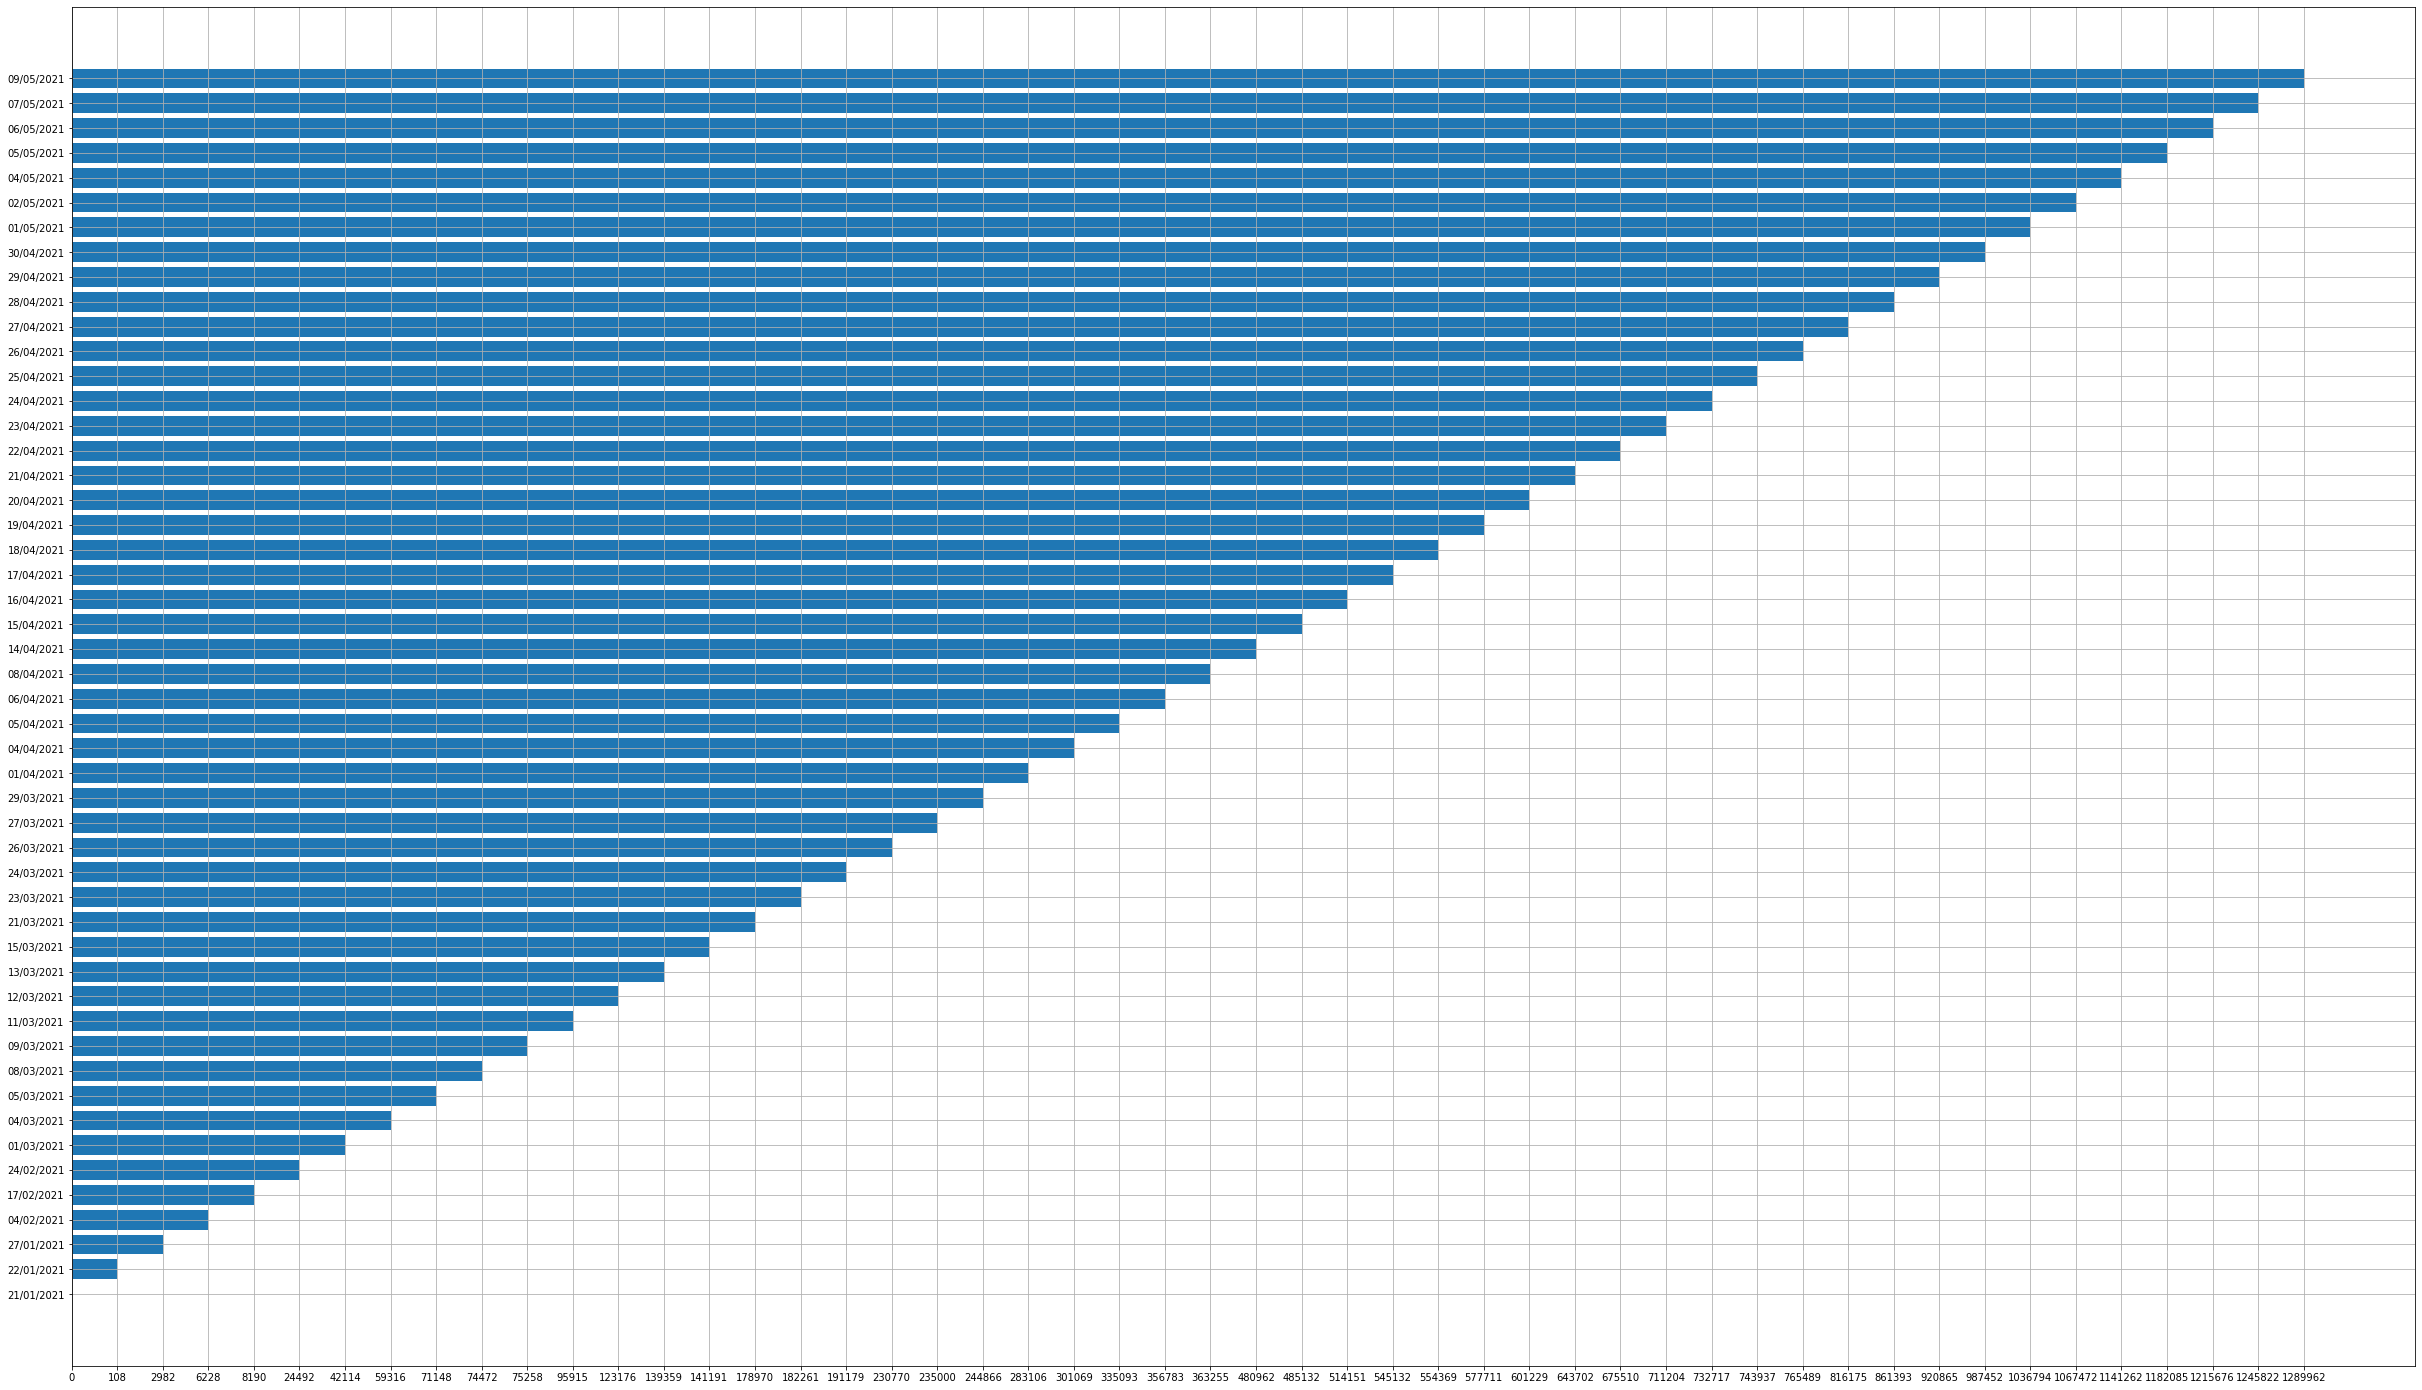

In [4]:
plt.barh(df_vacunados['fecha'][1:], df_vacunados['dosis_total'][1:])
plt.gcf().set_size_inches(42, 25)
plt.grid()
plt.show()

## 1.2. Generar grafico de pie por fabricante de la vacuna.

In [5]:
df_fabricados = pd.read_csv(url_fabricantes, header = None)
df_fabricados.columns = ['vaccine', 'total', 'arrived_at']
df_fabricados

,vaccine,total,arrived_at
0,vaccine,total,arrived_at
1,Pfizer/BioNTech,8190,20/01/2021
2,Pfizer/BioNTech,16380,17/02/2021
3,Pfizer/BioNTech,17550,24/02/2021
4,Pfizer/BioNTech,31590,03/03/2021
5,Sinovac,20000,06/03/2021
6,Pfizer/BioNTech,73710,10/03/2021
7,Oxford/AstraZeneca,84000,17/03/2021
8,Pfizer/BioNTech,62010,17/03/2021
9,Pfizer/BioNTech,65520,24/03/2021


['Pfizer/BioNTech' 'Sinovac' 'Oxford/AstraZeneca']
[ 659880 1020000  420000]


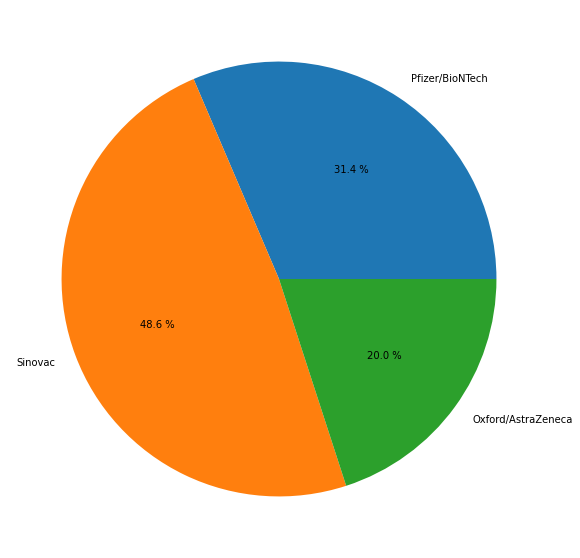

In [6]:
a = np.array(list(set(df_fabricados['vaccine'][1:])))
print(a)

ox = 0
si = 0
pf = 0
for i, j in zip(df_fabricados['vaccine'][1:], df_fabricados['total'][1:]):
  if i == a[0]:
    si = si + + int(j)
  elif i == a[1]:
    pf = pf + + int(j)
  elif i == a[2]:
    ox = ox + int(j)

b = np.array([si, pf, ox])
print(b)
plt.pie(b, labels=a, autopct="%0.1f %%")
plt.gcf().set_size_inches(50, 10)
plt.show()

## 1.3. Generar histogramas de vacunas por mes de llega y fabricante.

i: Pfizer/BioNTech ----j 8190 ------------ k: 20/01/2021
i: Pfizer/BioNTech ----j 16380 ------------ k: 17/02/2021
i: Pfizer/BioNTech ----j 17550 ------------ k: 24/02/2021


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


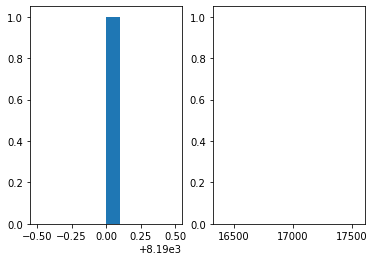

In [7]:
lista1=[]
for i in range(1, 32):
  lista1.append(0)
#print(lista1)
#lista1[20 - 1] = 20
for i, j, k in zip(df_fabricados['vaccine'][1:], df_fabricados['total'][1:], df_fabricados['arrived_at'][1:]):
  fecha_dt = datetime.datetime.strptime(k, '%d/%m/%Y')
  #print("fecha: {} - mes: {}".format(fecha_dt, type(fecha_dt.month)))
  if((i == a[0] or i == a[1] or i == a[2]) and (fecha_dt.month == 1)):
    print("i: {} ----j {} ------------ k: {}".format(i, j, k))
    plt.subplot(1, 2, 1)
    plt.hist(int(j))
    #plt.axis([1, 31, 0, int(j)])
  elif((i == a[0] or i == a[1] or i == a[2]) and (fecha_dt.month == 2)):
    print("i: {} ----j {} ------------ k: {}".format(i, j, k))
    plt.subplot(1, 2, 2)
    plt.hist(int(j))
    #plt.axis([1, 31, 0, int(j)])

# **2. Generar un reporte parametrizado que pueda ingresar los datos de las fechas inicio y fin para obtener la información de las graficas vistas en el primer punto.**

# **3. Generar un modelo matemático de predicción para regresión lineal, exponencial, polinómico y logarítmico, del procesos de vacunación en base al numero actual de vacunados (1 y 2 dosis) y a la llegada de nuevas vacunas.**

In [8]:
df_planvacunarse = pd.read_csv(url_planvacunarse, header = None)
df_planvacunarse.columns = ['fecha', 'primera_dosis', 'segunda_dosis']
df_planvacunarse

,fecha,primera_dosis,segunda_dosis
0,fecha,primera_dosis,segunda_dosis
1,2021-01-21,1500,0
2,2021-01-22,538,1
3,2021-01-23,31,0
4,2021-01-24,0,0
...,...,...,...
101,2021-05-01,37962,3804
102,2021-05-02,34557,562
103,2021-05-03,43546,3165
104,2021-05-04,28035,5089


## 3.1. Regresion Lineal

In [9]:
lista_total_pr = []
lista_total_se = []
for i, j in zip(df_vacunados['primera_dosis'][1:], df_vacunados['segunda_dosis'][1:]):
  lista_total_pr.append(i)
  lista_total_se.append(j)
da = np.array(lista_total_pr, dtype='int')
#print(da)
#print("-------")
to = np.array(lista_total_se, dtype='int')
#x = np.arange(1, len(to) + 1, 1)
#print(len(to))

In [10]:
# Creamos el objeto de Regresión Lineal
reg = linear_model.LinearRegression()

# Entrenamos nuestro modelo
reg.fit(np.array(da).reshape(-1, 1), to)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', reg.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', reg.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [0.30545448]
Independent term: 
 10722.682606235307


In [11]:
y_prediccion = reg.predict([[100]])
print(int(y_prediccion))

10753


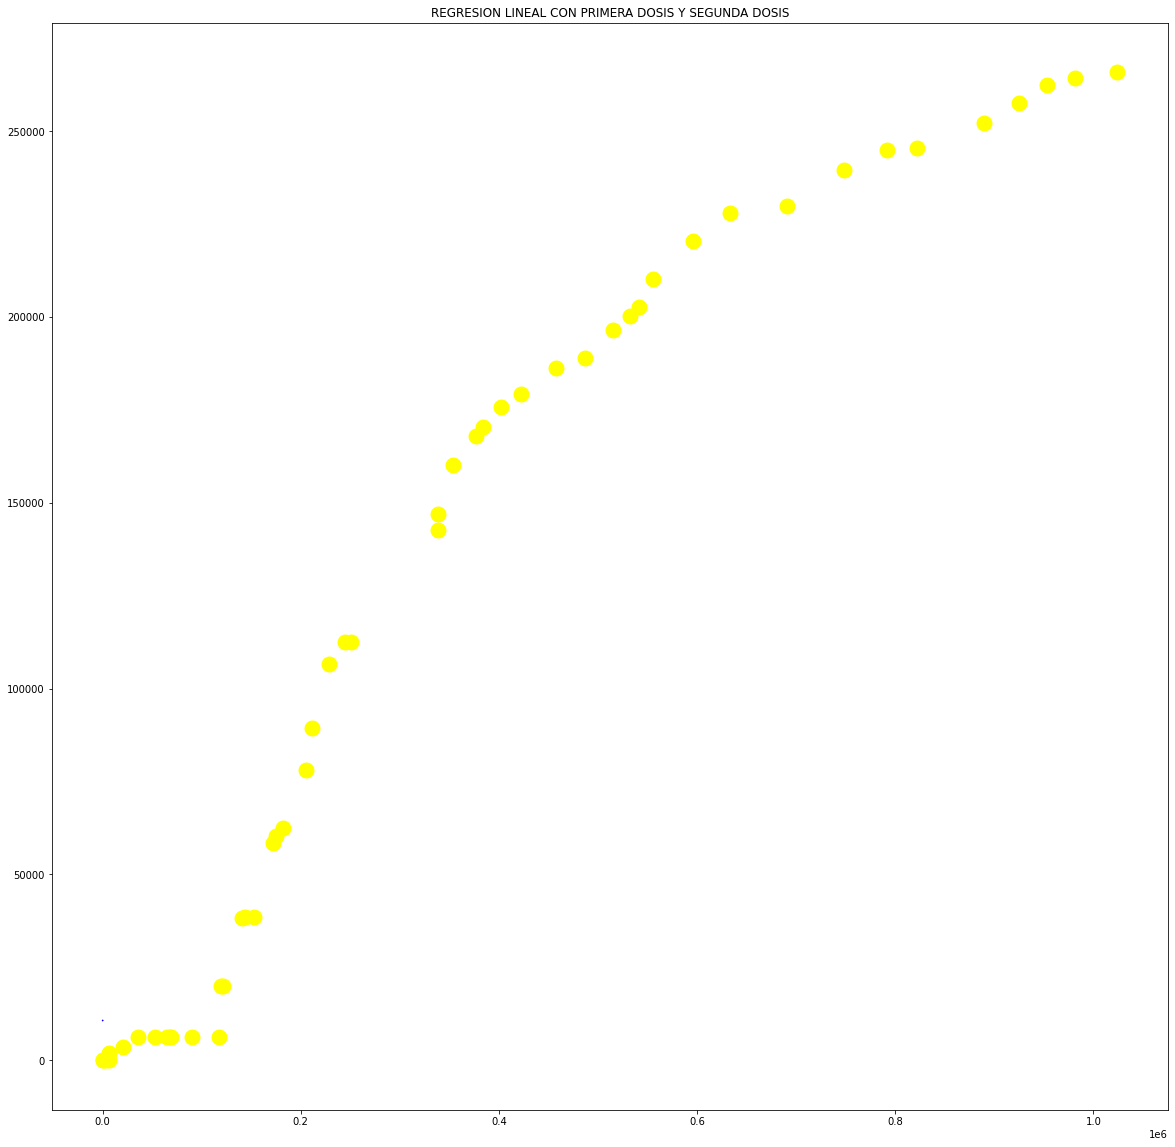

In [12]:
plt.scatter(da, to, color='yellow', lw=10)
plt.title('REGRESION LINEAL CON PRIMERA DOSIS Y SEGUNDA DOSIS')
ree = np.array(range(1, len(da) + 1))
plt.plot(ree, reg.predict(ree.reshape(-1, 1)), color='blue')
plt.gcf().set_size_inches(20, 20)

In [13]:
lista_total_arr = []
lista_total_to = []
FMT = '%d/%m/%Y'
datev = df_fabricados['arrived_at'][1:]
df_fabricados['arrived_at'] = datev.map(lambda x : (datetime.datetime.strptime(x, FMT) - datetime.datetime.strptime("20/01/2021", FMT)).days)
for i, j in zip(df_fabricados['arrived_at'][1:], df_fabricados['total'][1:]):
  lista_total_arr.append(i)
  lista_total_to.append(j)
dav = np.array(lista_total_arr, dtype='int')
#print(da)
#print("-------")
tov = np.array(lista_total_to, dtype='int')
#x = np.arange(1, len(to) + 1, 1)
#print(len(to))

In [14]:
# Creamos el objeto de Regresión Lineal
regv = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regv.fit(np.array(dav).reshape(-1, 1), tov)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regv.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regv.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [2357.78613196]
Independent term: 
 -33583.37185325386


In [15]:
y_prediccionv = regv.predict([[100]])
print(int(y_prediccionv))

202195


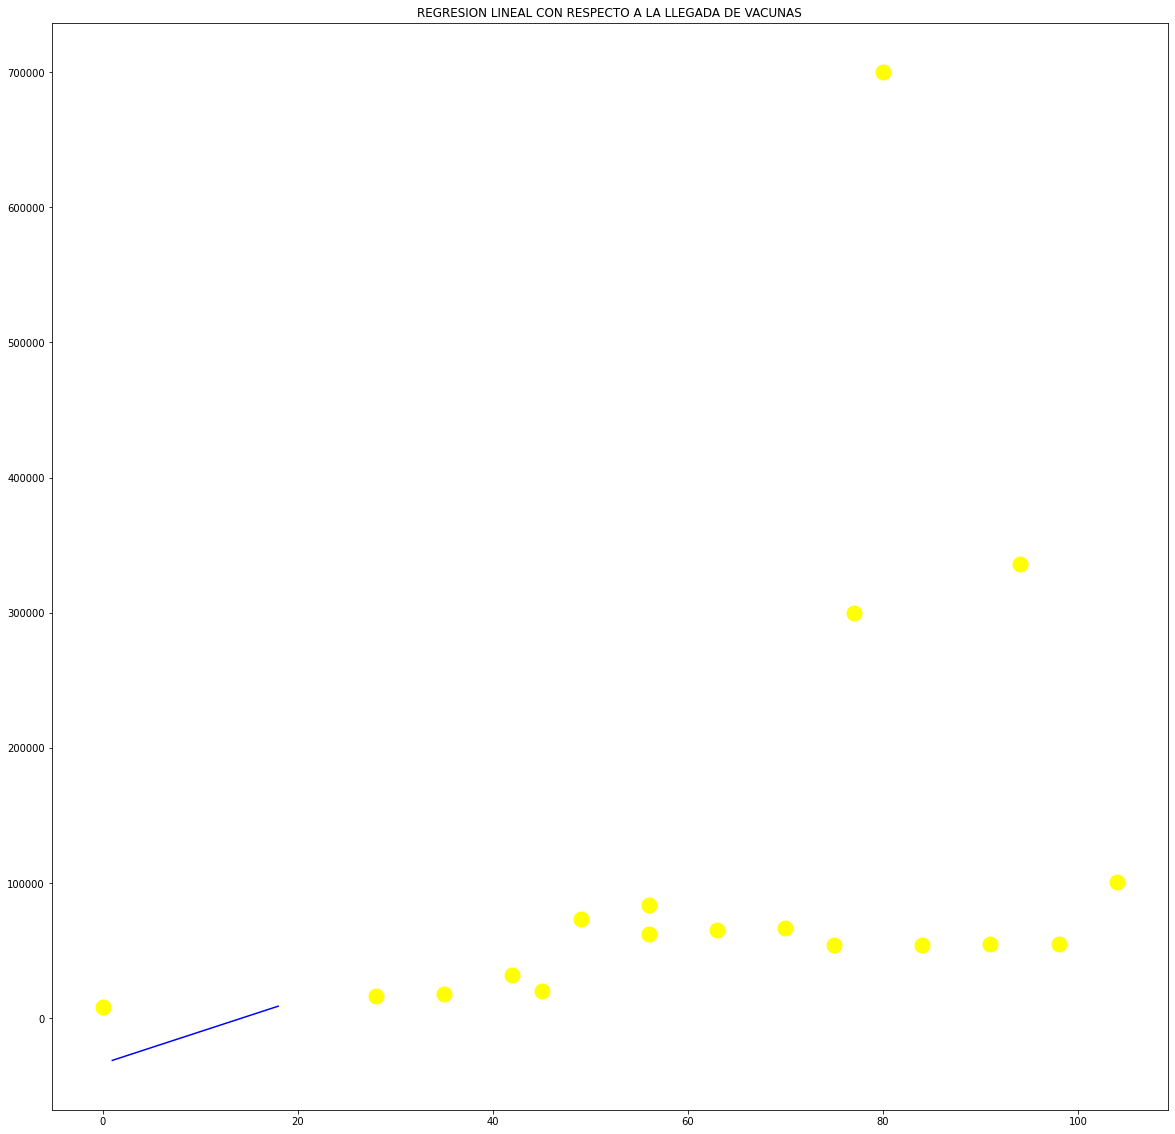

In [16]:
plt.scatter(dav, tov, color='yellow', lw=10)
plt.title('REGRESION LINEAL CON RESPECTO A LA LLEGADA DE VACUNAS')
reev = np.array(range(1, len(dav) + 1))
plt.plot(reev, regv.predict(reev.reshape(-1, 1)), color='blue')
plt.gcf().set_size_inches(20, 20)

## 3.2. Regresion Logaritmica


In [17]:
def modelo_logistico(da,a,b):
    return a+b*np.log(da)

exp_fit = curve_fit(modelo_logistico,da,to) #Extraemos los valores de los paramatros
print(exp_fit)

(array([1., 1.]), array([[inf, inf],
       [inf, inf]]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


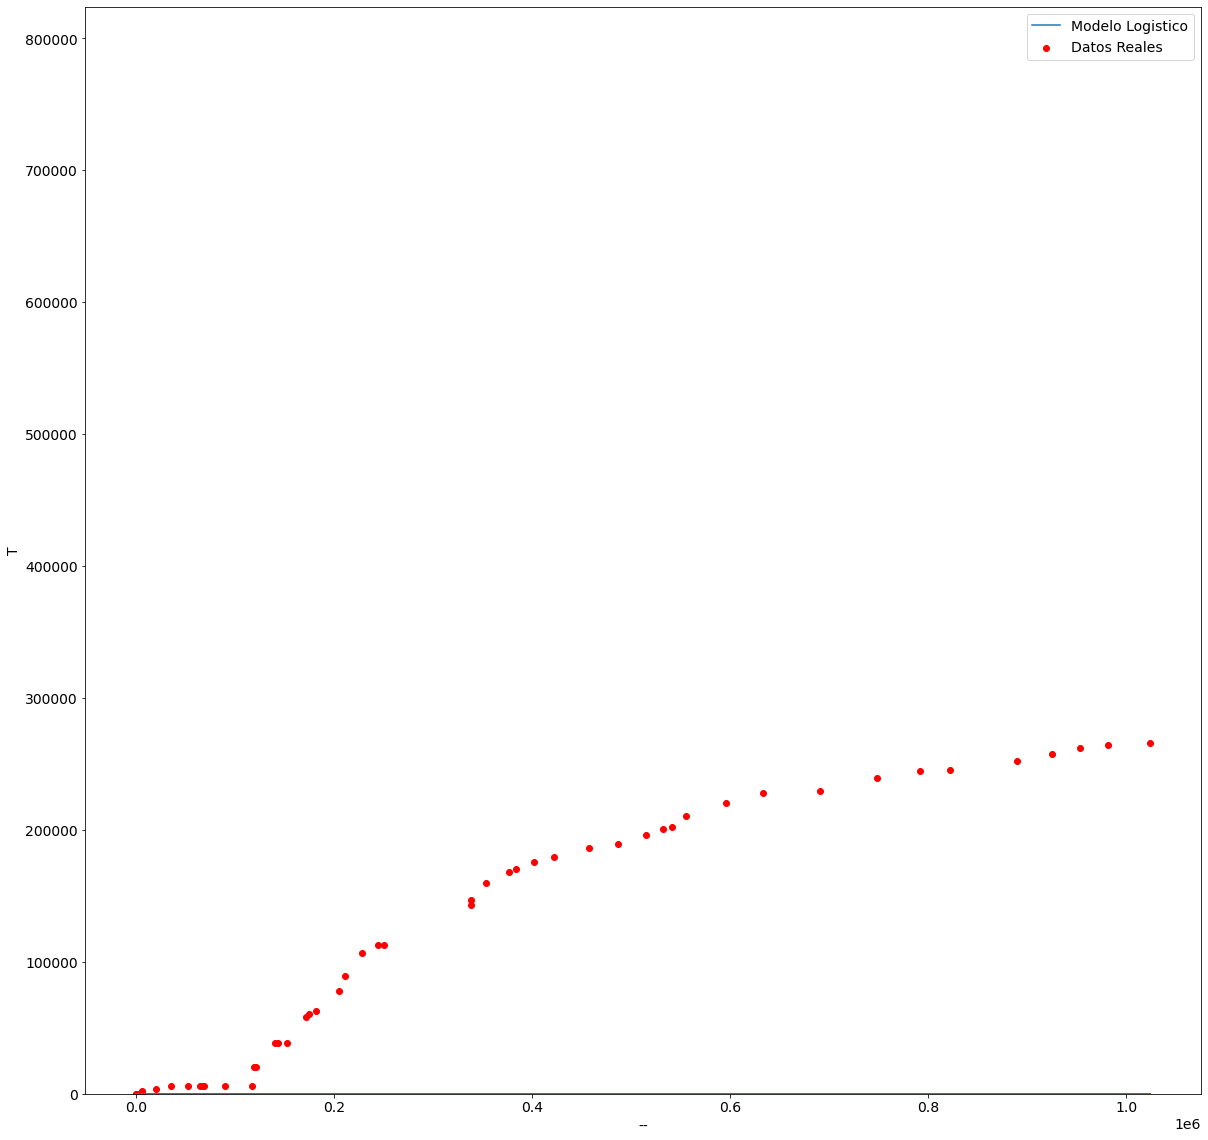

In [18]:
pred_x = list(range(min(da.astype(int)),max(da.astype(int))+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(da,to,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.gcf().set_size_inches(20, 20)
plt.xlabel("--")
plt.ylabel("T")
plt.ylim((min(to)*0.9,max(to)*3.1)) # Definir los limites de Y
plt.show()

In [19]:
def modelo_logisticov(dav,a,b):
    return a+b*np.log(dav)

exp_fitv = curve_fit(modelo_logisticov,dav,tov) #Extraemos los valores de los paramatros
print(exp_fitv)

(array([1., 1.]), array([[inf, inf],
       [inf, inf]]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


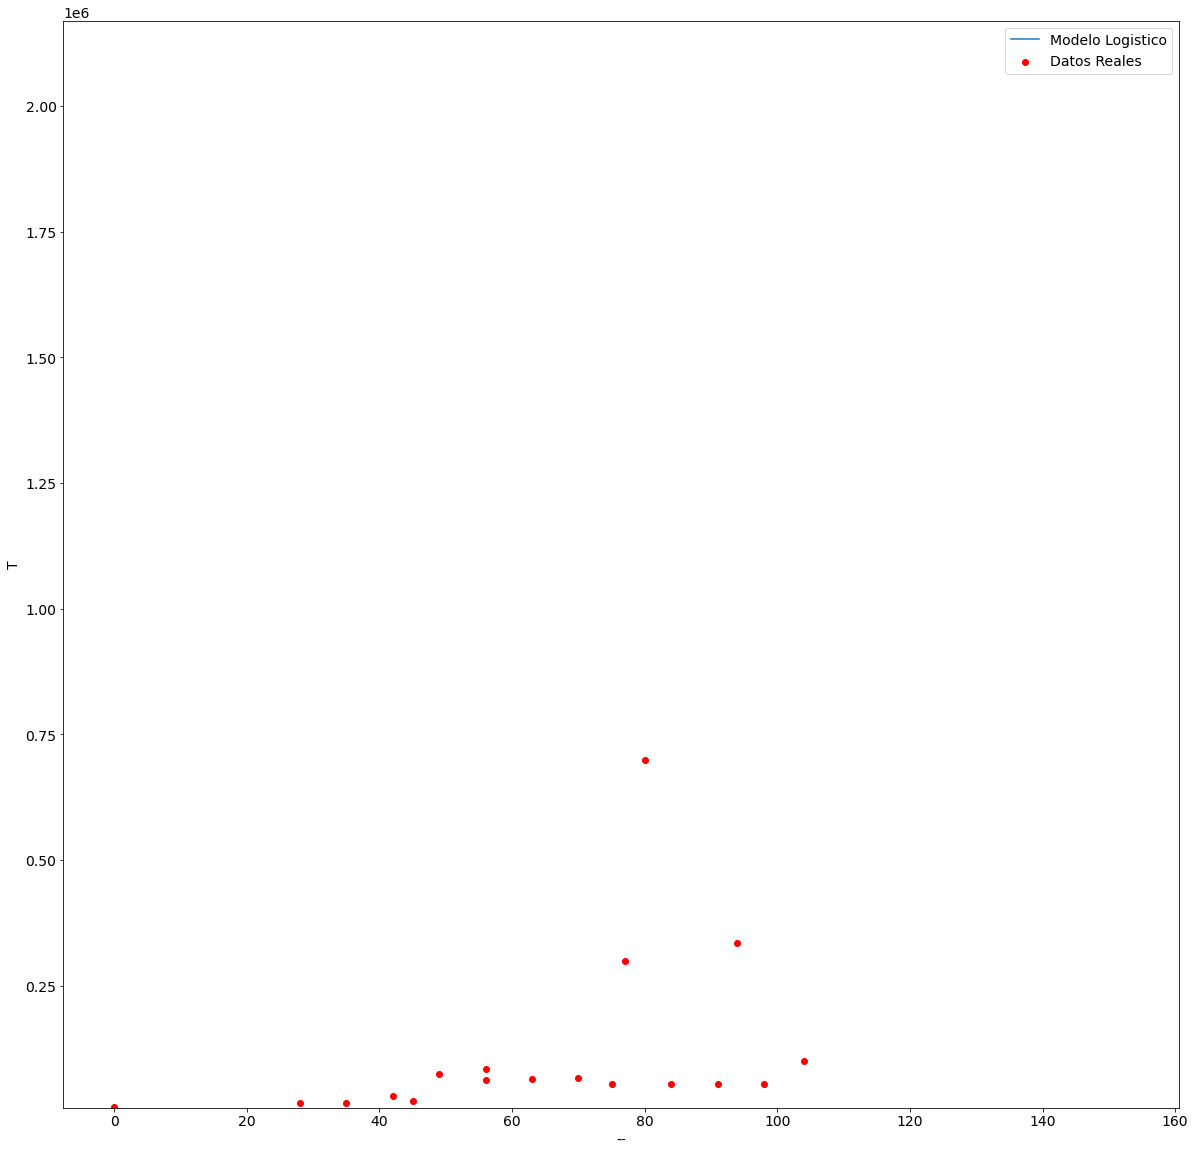

In [20]:
pred_xv = list(range(min(dav.astype(int)),max(dav.astype(int))+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(dav,tov,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_xv, [modelo_logisticov(i,exp_fitv[0][0],exp_fitv[0][1]) for i in pred_xv], label="Modelo Logistico" )
plt.legend()
plt.gcf().set_size_inches(20, 20)
plt.xlabel("--")
plt.ylabel("T")
plt.ylim((min(tov)*0.9,max(tov)*3.1)) # Definir los limites de Y
plt.show()

## 3.3. Regresion Exponencial

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


[nan nan]


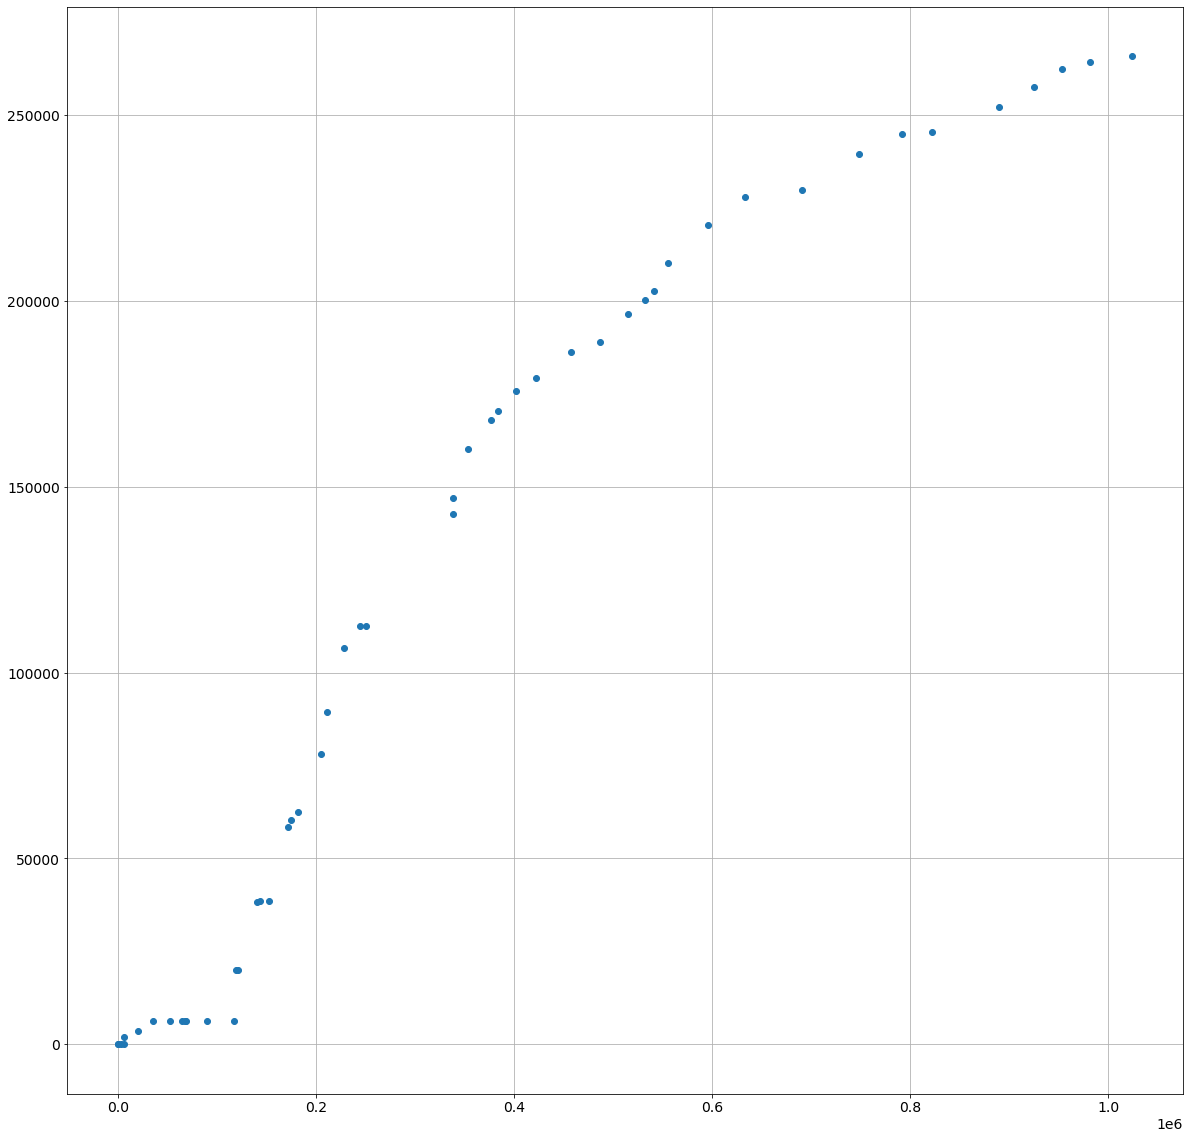

In [21]:
# Implementar
curve_fit = np.polyfit(da, np.log(to), deg=1)
print(curve_fit)
pred_x = np.array(list(range(min(da), max(da)+15)))
yx = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*pred_x)
plt.plot(da,to,"o")
plt.plot(pred_x,yx, color="gold")
plt.gcf().set_size_inches(20, 20)
plt.grid(True)

[0.02839224 9.21643734]


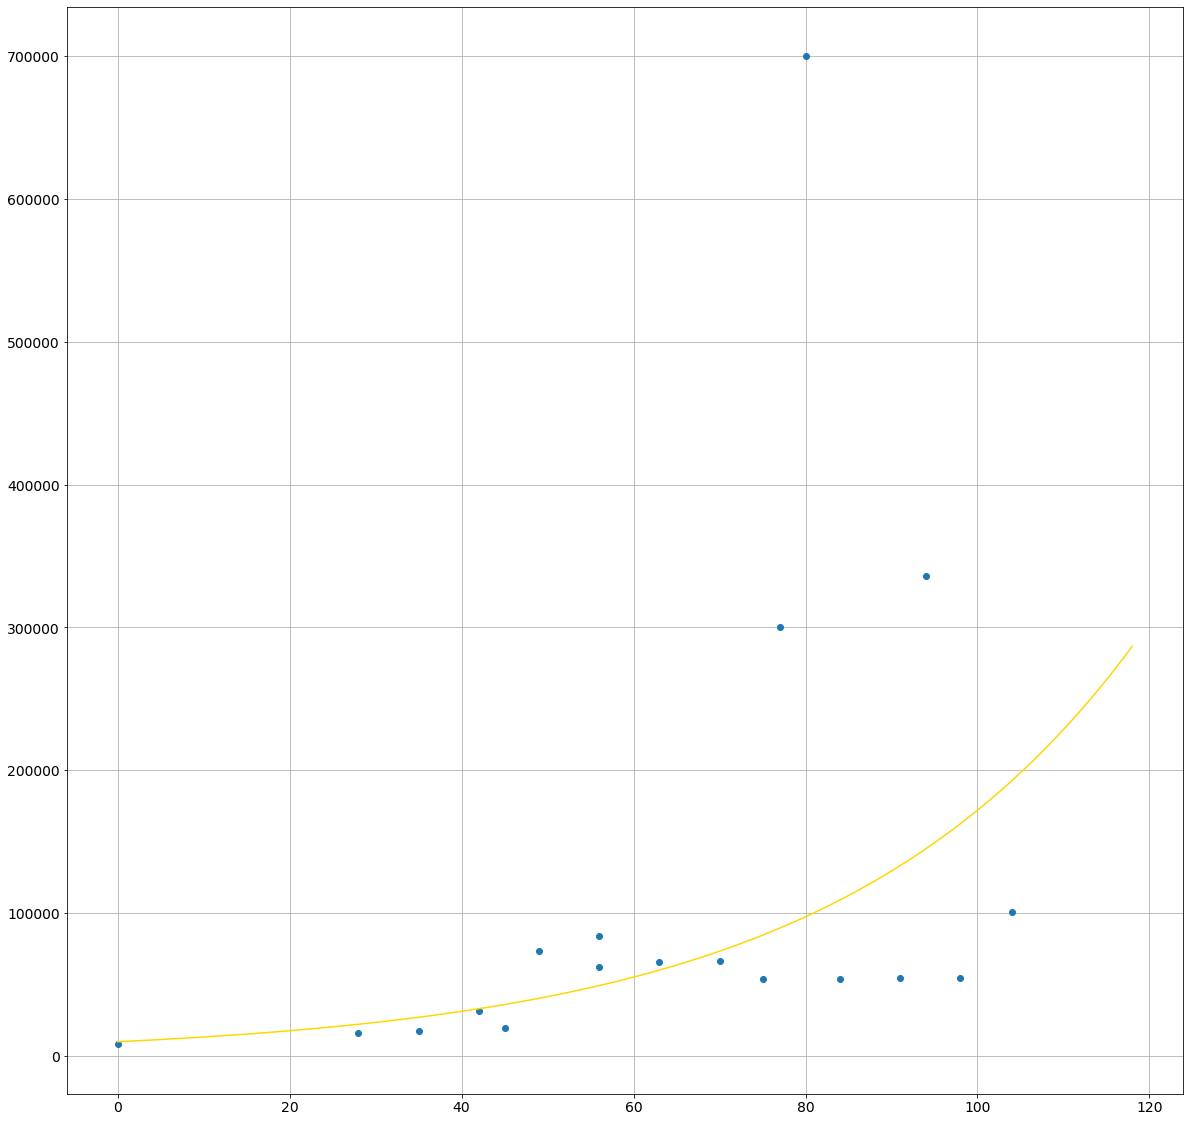

In [22]:
# Implementar
curve_fitv = np.polyfit(dav, np.log(tov), deg=1)
print(curve_fitv)
pred_xv = np.array(list(range(min(dav), max(dav)+15)))
yxv = np.exp(curve_fitv[1]) * np.exp(curve_fitv[0]*pred_xv)
plt.plot(dav,tov,"o")
plt.plot(pred_xv,yxv, color="gold")
plt.gcf().set_size_inches(20, 20)
plt.grid(True)

## 3.4. Regresion Polinomial

        4         3         2
0.1036 x - 16.57 x + 840.1 x - 8612 x + 1.964e+04


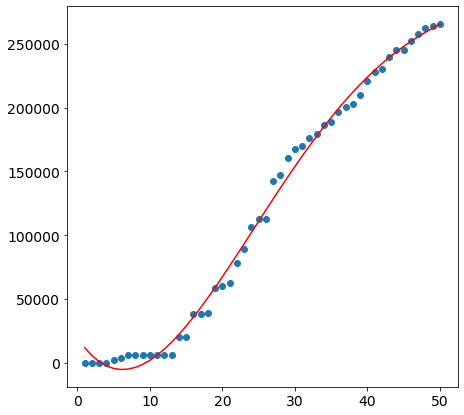

In [23]:
xpol=np.arange(1, len(da)+1, 1)

fun1 = np.poly1d(np.polyfit(xpol, to, 4))
print(fun1)
y_pred=fun1(xpol)
plt.scatter(xpol, to)
plt.plot(xpol, y_pred, c='r')  
plt.show()


       4         3        2
-34.6 x + 842.2 x - 4198 x + 5865 x + 1.563e+04


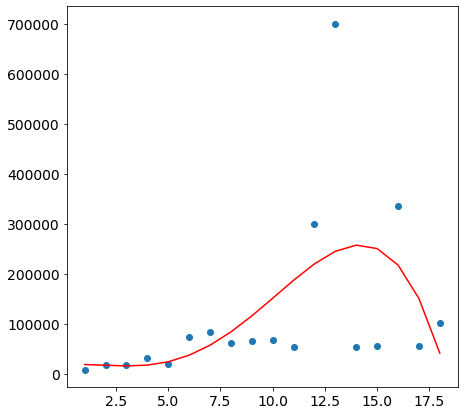

In [24]:
xpolv=np.arange(1, len(dav)+1, 1)

fun1v = np.poly1d(np.polyfit(xpolv, tov, 4))
print(fun1v)
y_predv=fun1v(xpolv)
plt.scatter(xpolv, tov)
plt.plot(xpolv, y_predv, c='r')  
plt.show()

# **4. Desarrollar y generar un proceso de comparación con al menos cuatro países (2. Latinoamérica, 1. E.E.U.U./Canada,  1. Europa).**
## 4.1. Generar las graficas de regresión y comparar.

In [25]:
url_vacunasmundiales = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df_vacunasmundiales = pd.read_csv(url_vacunasmundiales, header = None)
df_vacunasmundiales.columns = ['location', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']
df_vacunasmundiales

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
1,Afghanistan,AFG,2021-02-22,0,0,NaN,NaN,NaN,0,0,NaN,NaN
2,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35
3,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35
4,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35
...,...,...,...,...,...,...,...,...,...,...,...,...
17309,Zimbabwe,ZWE,2021-05-05,576233,461023,115210,16456,16889,3.88,3.1,0.78,1136
17310,Zimbabwe,ZWE,2021-05-06,607355,478174,129181,31122,18537,4.09,3.22,0.87,1247
17311,Zimbabwe,ZWE,2021-05-07,640762,500422,140340,33407,20060,4.31,3.37,0.94,1350
17312,Zimbabwe,ZWE,2021-05-08,657838,509274,148564,17076,19648,4.43,3.43,1,1322


In [26]:
def comparacion(nombre):
  url_vacunasmundiales = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
  df_vacunasmundiales = pd.read_csv(url_vacunasmundiales, header = None).fillna(0)
  df_vacunasmundiales.columns = ['location', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']
  #df_vacunasmundiales

  lista_total_fechas = []
  lista_total_tot = []
  lista_total_fechasbr = []
  lista_total_totbr = []
  FMT = '%Y-%m-%d'
  date = df_vacunasmundiales['date'][1:]
  df_vacunasmundiales['date'] = date.map(lambda x : (datetime.datetime.strptime(x, FMT) - datetime.datetime.strptime("2021-01-21", FMT)).days)
  

  for i, j, k in zip(df_vacunasmundiales['location'], df_vacunasmundiales['date'], df_vacunasmundiales['people_fully_vaccinated']):
    if i == 'Ecuador':
      lista_total_fechas.append(j)
      lista_total_tot.append(k)
    elif i == nombre:
      lista_total_fechasbr.append(j)
      lista_total_totbr.append(k)
  dat = np.array(lista_total_fechas)
  print(dat)
  print("-------")
  tot = np.array(lista_total_tot, dtype='float')
  x = np.arange(1, len(tot) + 1, 1)
  print(len(tot))
  print("###########################################")
  dat_br = np.array(lista_total_fechasbr)
  print(dat_br)
  print("-------")
  tot_br = np.array(lista_total_totbr, dtype='float')
  xbr = np.arange(1, len(tot_br) + 1, 1)
  print(len(tot_br))

  #####ECUADOR######
  print("ECUADOR")
  # Creamos el objeto de Regresión Lineal
  regr = linear_model.LinearRegression()
  
  # Entrenamos nuestro modelo
  regr.fit(np.array(x).reshape(-1, 1), tot)

  # Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
  print('Coefficients: \n', regr.coef_)
  # Este es el valor donde corta el eje Y (en X=0)
  print('Independent term: \n', regr.intercept_)
  # Error Cuadrado Medio
  print("##########################")
  print(nombre)
  ######### ############
  # Creamos el objeto de Regresión Lineal
  regrbr = linear_model.LinearRegression()
  
  # Entrenamos nuestro modelo
  regrbr.fit(np.array(xbr).reshape(-1, 1), tot_br)

  # Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
  print('Coefficients: \n', regrbr.coef_)
  # Este es el valor donde corta el eje Y (en X=0)
  print('Independent term: \n', regrbr.intercept_)
  # Error Cuadrado Medio


  print("ECUADOR")
  y_prediccion = regr.predict([[100]])
  print(int(y_prediccion))
  print(nombre)
  y_prediccionbr = regrbr.predict([[100]])
  print(int(y_prediccionbr))

  fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(20,20))
  fig.suptitle('COMPARACION ECUADOR VS. ' + nombre + ' EN VACUNADOS POR COMPLETO')
  ax1.scatter(x, tot, color='yellow')
  ax1.set_title('ECUADOR')
  re = np.array(range(1, len(tot) + 1))
  ax1.plot(re, regr.predict(re.reshape(-1, 1)), color='blue')
  ax2.scatter(xbr, tot_br, color='green')
  ax2.set_title(nombre)
  rb = np.array(range(1, len(tot_br) + 1))
  ax2.plot(rb, regrbr.predict(rb.reshape(-1, 1)), color='black')

### 4.1.1. Ecuador con Brazil

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106.]
-------
107
###########################################
[ -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.
   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.
  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.
  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.
  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.
  65.  66.  67.  68.  69.  70.  71.  72.  73.

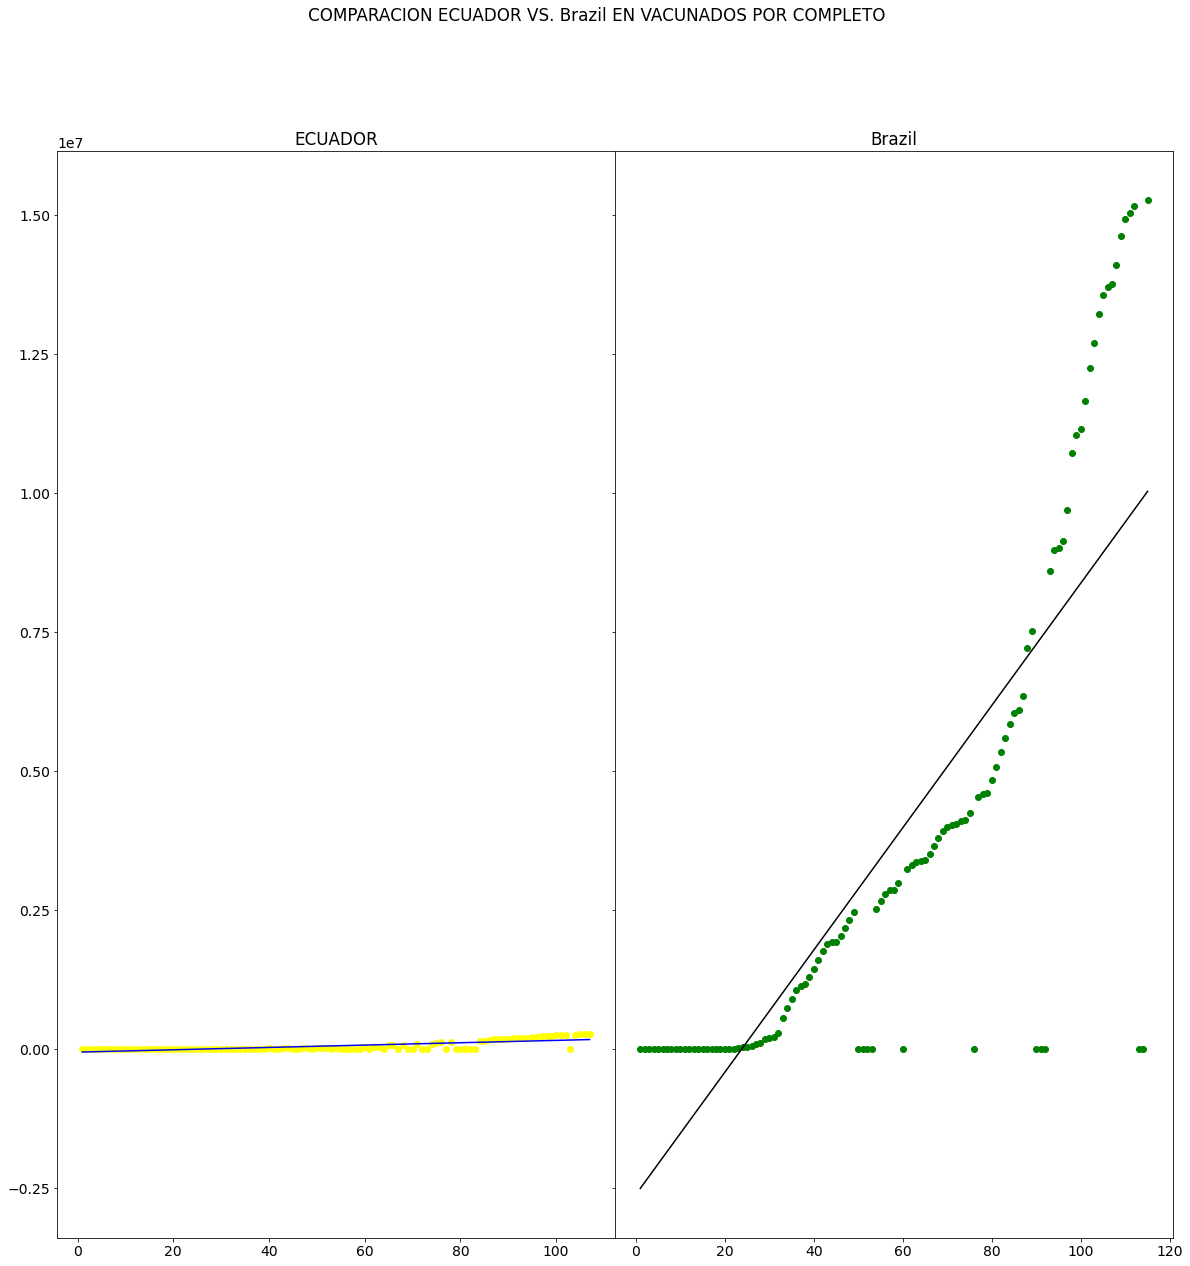

In [27]:
comparacion('Brazil')

### 4.1.2. Ecuador con Argentina

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106.]
-------
107
###########################################
[-23. -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.
  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.
   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.
  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.
  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.
  47.  48.  49.  50.  51.  52.  53.  54.  55.

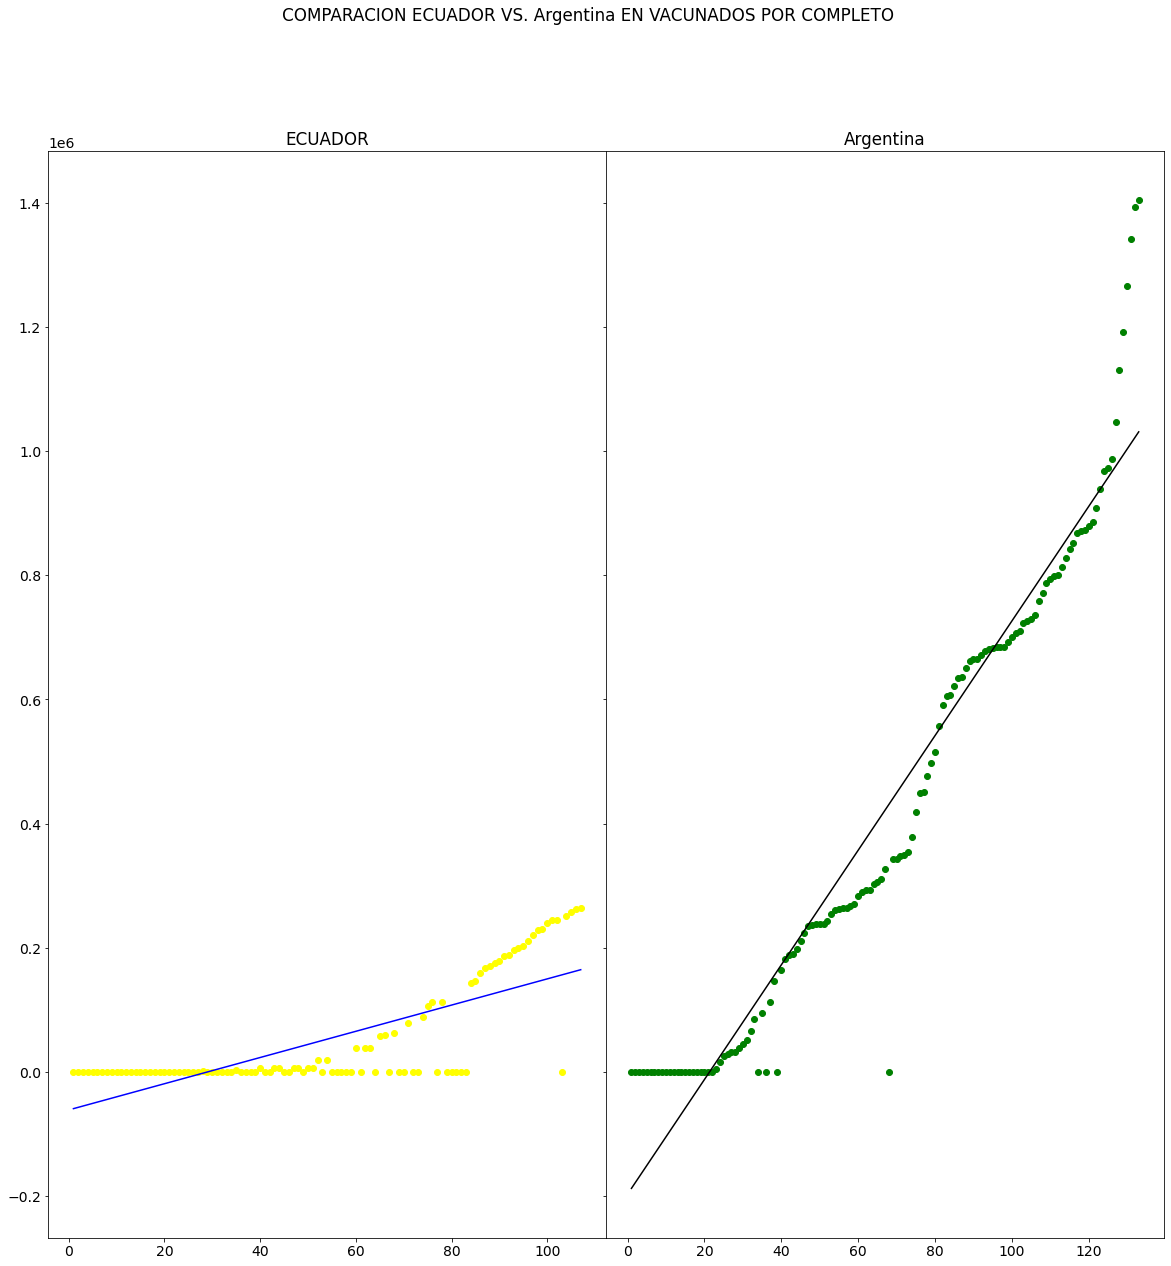

In [28]:
comparacion('Argentina')

### 4.1.3. Ecuador con Inglaterra

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106.]
-------
107
###########################################
[-18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.
  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.
  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.
  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.

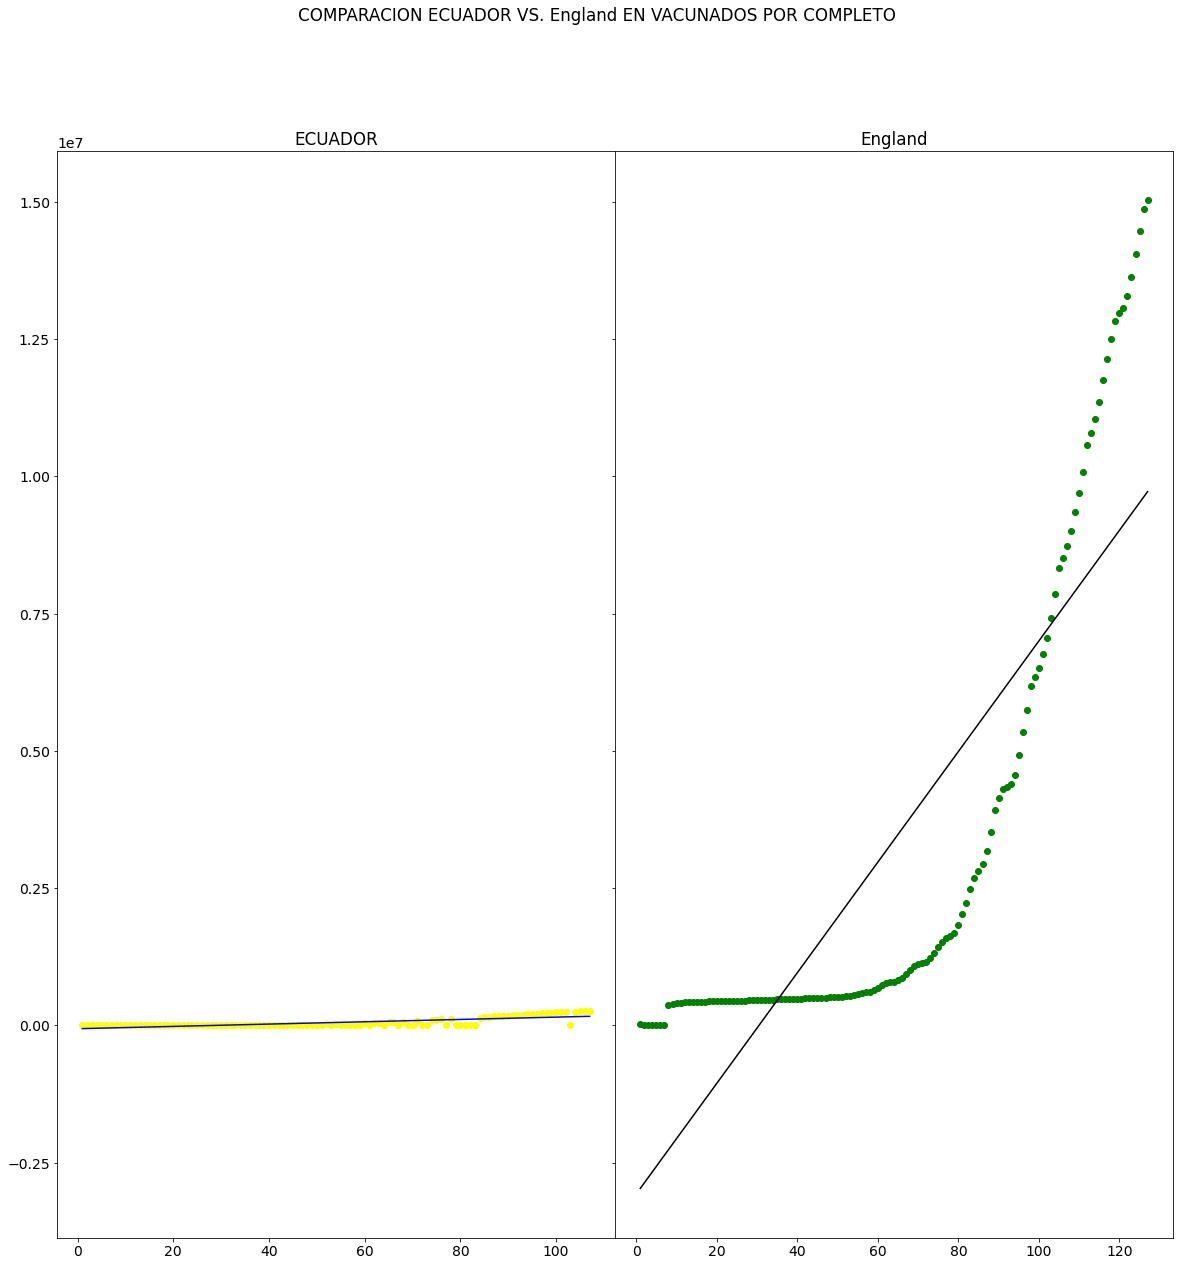

In [29]:
comparacion('England')

### 4.1.4. Ecuador con EEUU

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106.]
-------
107
###########################################
[-32. -31. -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19.
 -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.
  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.
  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.
  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.

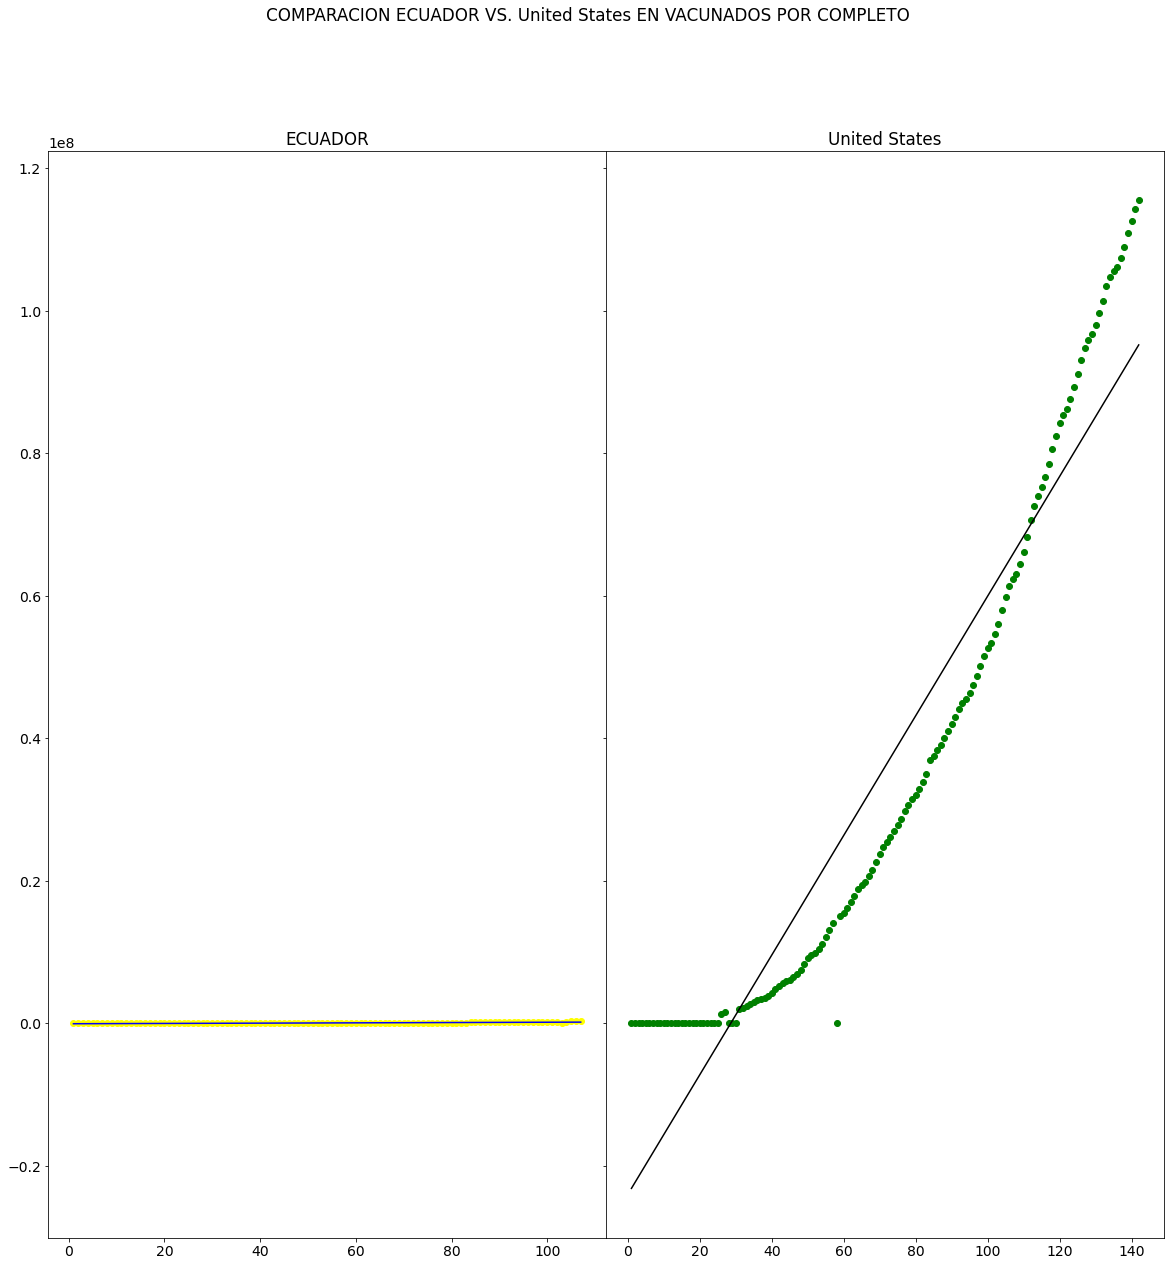

In [30]:
comparacion('United States')

# **Puntos Adicionales:**
## - Generar una correlación del plan de vacunas con las vacunas realizadas actuales.


In [31]:
FMT = '%Y-%m-%d'
date = df_planvacunarse['fecha'][1:]
df_planvacunarse['fecha'][1:] = date.map(lambda x : (datetime.datetime.strptime(x, FMT) - datetime.datetime.strptime("2021-01-21", FMT)).days)

df_planvacunarse

,fecha,primera_dosis,segunda_dosis
0,fecha,primera_dosis,segunda_dosis
1,0,1500,0
2,1,538,1
3,2,31,0
4,3,0,0
...,...,...,...
101,100,37962,3804
102,101,34557,562
103,102,43546,3165
104,103,28035,5089


In [32]:
xpd = np.array(df_planvacunarse['primera_dosis'][1:], dtype='float')
ypd = np.array(df_planvacunarse['segunda_dosis'][1:], dtype='float')
#X = np.array(df_planvacunarse['fecha'][1:], dtype='float')
#Y = np.array(df_planvacunarse['fecha'][1:], dtype='float')
#C = np.corrcoef(X,Y)
#print(C)
xpd = np.append(xpd, [.0, .0, .0])
print(xpd)
print("----------")
ypd = np.append(ypd, [.0, .0, .0])
print(ypd)


[1.5000e+03 5.3800e+02 3.1000e+01 0.0000e+00 6.2200e+02 3.8500e+02
 3.5100e+02 1.1100e+02 1.0100e+02 0.0000e+00 5.8000e+01 6.0800e+02
 5.9100e+02 1.3500e+03 4.5000e+01 2.0000e+00 0.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 9.0000e+00 2.7000e+01 1.0000e+01 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00 1.0129e+04 2.9500e+03
 0.0000e+00 8.5000e+01 8.0400e+02 1.3000e+01 2.1000e+01 9.3570e+03
 4.4870e+03 5.5000e+01 6.0000e+00 1.4100e+02 1.5800e+02 2.7000e+01
 1.3842e+04 1.1005e+04 2.3700e+03 2.2300e+02 2.9690e+03 9.5900e+02
 3.9500e+02 1.4535e+04 2.4915e+04 8.3250e+03 6.8300e+02 4.4420e+03
 3.8660e+03 3.0770e+03 1.3590e+03 1.5740e+03 2.7850e+03 8.9700e+02
 1.9608e+04 1.2069e+04 5.0350e+03 5.0040e+03 5.7730e+03 2.2890e+03
 2.7000e+02 9.2760e+03 4.3580e+03 6.3970e+03 1.1372e+04 3.0950e+03
 2.7460e+03 1.6830e+03 1.6276e+04 1.6055e+04 2.1249e+04 6.0490e+03
 3.3380e+03 6.1500e+02 3.6000e+01 4.8300e+02 2.2013e+04 1.7206e+04
 1.7555e+04 1.7558e+04 2.3147e+04 2.1550e+03 1.9403e+04 2.4486

In [33]:
xv = np.array(df_vacunados['primera_dosis'][1:], dtype='float')
yv = np.array(df_vacunados['segunda_dosis'][1:], dtype='float')
xv = np.insert(xv, 2, [0, 0, 0, 0])
xv = np.insert(yv, 7, [0, 0, 0, 0, 0, 0, 0])
print(xv)
yv = np.insert(yv, 7, [0, 0, 0, 0])
yv = np.insert(yv, 7, [0, 0, 0, 0, 0, 0, 0])
print(yv)

[     0.      0.      0.      0.   1962.   3708.   6228.      0.      0.
      0.      0.      0.      0.      0.   6228.   6228.   6228.   6228.
   6228.   6228.  20137.  20137.  38205.  38647.  38653.  58357.  60358.
  62537.  78204.  89349. 106589. 112624. 112624. 142782. 146952. 160132.
 167933. 170276. 175840. 179292. 186299. 188986. 196350. 200350. 202517.
 210224. 220476. 227972. 229865. 239431. 244972. 245512. 252044. 257546.
 262438. 264202. 265841.]
[     0.      0.      0.      0.   1962.   3708.   6228.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
   6228.   6228.   6228.   6228.   6228.   6228.  20137.  20137.  38205.
  38647.  38653.  58357.  60358.  62537.  78204.  89349. 106589. 112624.
 112624. 142782. 146952. 160132. 167933. 170276. 175840. 179292. 186299.
 188986. 196350. 200350. 202517. 210224. 220476. 227972. 229865. 239431.
 244972. 245512. 252044. 257546. 262438. 264202. 265841.]


-------------------------